# Path pattern generating Prototype

## Libraries

In [1]:
import ppg_init as ppg
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from queue import Queue
from queue import LifoQueue
import math

/d/APh504/Bachelor/Semester 10/1.project/my_project/offline_processing


## Fetch preprocessed data

In [2]:
number_gray = np.zeros((ppg.NO_DIGITS, ppg.IMG_WIDTH ,ppg.IMG_HEIGHT))
for i in range (ppg.NO_DIGITS):
    number_image = cv.imread(ppg.IMAGE_PATH+' '+str(i)+' dilated.png')
    number_gray[i] = cv.cvtColor(number_image, cv.COLOR_BGR2GRAY)

## Change resolution


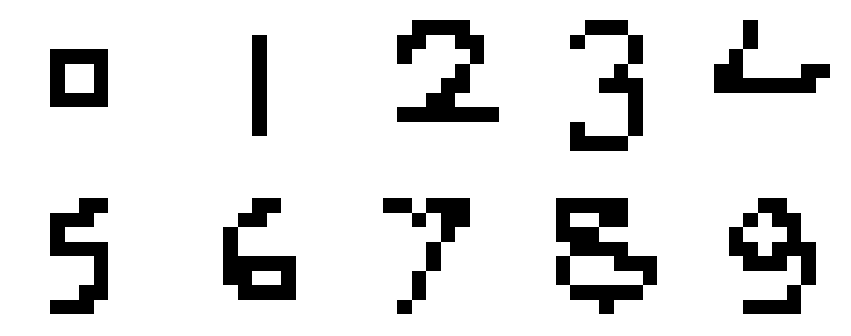

In [3]:
stride = 30
lrbp_threshold = 10 # low resolution black pixels threshold. 
# this is used when we want to count the number of the black pixels in the high resolution image
# and decide whether to mark the corresponding pixel in low resolution image black.
new_imgw = int(ppg.IMG_WIDTH/stride)
new_imgh = int(ppg.IMG_HEIGHT/stride)
new_img = np.ones((ppg.NO_DIGITS, new_imgw, new_imgh))*255
new_img2 = np.ones((ppg.NO_DIGITS, new_imgw, new_imgh))*255
# stride is always an odd number.

for i in range(ppg.NO_DIGITS):
    my_img = number_gray[i]
    # jump a 3,3 square and check for any black pixel within the area.

    for x in range(0, len(my_img), stride):
        for y in range(0, len(my_img[x]), stride):
            # stride is always an odd number.
            offset = int((stride-1)/2)
            new_x = int(x/stride)
            new_y = int(y/stride)
            black_pxl_vec = my_img[x-offset:x+offset+1,y-offset:y+offset+1]<50
            black_pxl_num = np.sum(has_black_vec)
#             print(has_black_pxl, end=' ')
            if(has_black_pxl>lrbp_threshold): # has at least one black pixel
                new_img[i,new_x,new_y] = 0
#         print(' ')
#     print('====================')
ppg.plot_digits(new_img)

## Storing the path sequence
the curviture the robot needs to draw and traverse.

In [4]:
pathq_digit = []
data = []
df = []
for i in range(ppg.NO_DIGITS):
    pathq_digit.append(Queue())
    data.append([])

In [5]:
def draw_char_img(i, new_img):
    print('----------------------------------------------------------- digit:', i)
    for x in range(len(new_img[i])):
        for y in range(len(new_img[i,x])):
            if(new_img[i,x,y]==0):
                print(' 0 ', end=', ')
            else:
                print(int(new_img[i, x, y]), end=', ')
        print('\n')

## Digit 0

In [6]:
i=0
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 0
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 , 255, 255, 255, 

255, 255, 255,  0 , 255, 255,  0 , 255, 255, 255, 

255, 255, 255,  0 , 255, 255,  0 , 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 , 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [7]:
pathq_digit[0].put((3,3))
pathq_digit[0].put((3,4))
pathq_digit[0].put((3,5))
pathq_digit[0].put((3,6))
pathq_digit[0].put((4,6))
pathq_digit[0].put((5,6))
pathq_digit[0].put((6,6))
pathq_digit[0].put((6,5))
pathq_digit[0].put((6,4))
pathq_digit[0].put((6,3))
pathq_digit[0].put((5,3))
pathq_digit[0].put((4,3))
pathq_digit[0].put((3,3))

data[i] = [(3,3),
         (3,4),
         (3,5),
         (3,6),
         (4,6),
         (5,6),
         (6,6),
         (6,5),
         (6,4),
         (6,3),
         (5,3),
         (4,3),
         (3,3)]

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 1

In [8]:
i=1
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 1
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [9]:
# i = 1
for x in range(2, 9):
    pathq_digit[i].put((x,5))
    data[i].append((x,5))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 2

In [10]:
i=2
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 2
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255,  0 ,  0 ,  0 ,  0 , 255, 255, 

255, 255, 255,  0 ,  0 , 255, 255,  0 ,  0 , 255, 

255, 255, 255,  0 , 255, 255, 255, 255,  0 , 255, 

255, 255, 255, 255, 255, 255, 255,  0 , 255, 255, 

255, 255, 255, 255, 255, 255,  0 ,  0 , 255, 255, 

255, 255, 255, 255, 255,  0 ,  0 , 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 ,  0 ,  0 ,  0 , 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [11]:
# i = 2
pathq_digit[i].put((3,3))
pathq_digit[i].put((2,3))
for y in range(4,8):
    pathq_digit[i].put((1,i))
for x in range(2,5):
    pathq_digit[i].put((i,8))
pathq_digit[i].put((5,7))
pathq_digit[i].put((6,5))
for y in range(3, 10):
    pathq_digit[i].put((7,y))


data[i].append((3,3))
data[i].append((2,3))
for y in range(4,8):
    data[i].append((1,i))
for x in range(2,5):
    data[i].append((i,8))
data[i].append((5,7))
data[i].append((6,5))
for y in range(3, 10):
    data[i].append((7,y))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 3

In [12]:
i=3
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 3
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255,  0 ,  0 ,  0 , 255, 255, 255, 

255, 255, 255,  0 , 255, 255, 255,  0 , 255, 255, 

255, 255, 255, 255, 255, 255, 255,  0 , 255, 255, 

255, 255, 255, 255, 255, 255,  0 , 255, 255, 255, 

255, 255, 255, 255, 255,  0 ,  0 ,  0 , 255, 255, 

255, 255, 255, 255, 255, 255, 255,  0 , 255, 255, 

255, 255, 255, 255, 255, 255, 255,  0 , 255, 255, 

255, 255, 255,  0 , 255, 255, 255,  0 , 255, 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 , 255, 255, 255, 



In [13]:
# i = 3
pathq_digit[i].put((2,3))
for y in range(4,7):
    pathq_digit[i].put((1,y))
for x in range(2,5):
    pathq_digit[i].put((x,7))
pathq_digit[i].put((5,5))
for x in range(6,9):
    pathq_digit[i].put((x,7))
for y in range(6,3,-1):
    pathq_digit[i].put((9,y))

data[i].append((2,3))
for y in range(4,7):
    data[i].append((1,y))
for x in range(2,5):
    data[i].append((x,7))
data[i].append((5,5))
for x in range(6,9):
    data[i].append((x,7))
for y in range(6,3,-1):
    data[i].append((9,y))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 4

In [14]:
i=4
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 4
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255,  0 , 255, 255, 255, 255, 255, 255, 

255, 255, 255,  0 , 255, 255, 255, 255, 255, 255, 

255, 255,  0 , 255, 255, 255, 255, 255, 255, 255, 

255,  0 ,  0 , 255, 255, 255, 255,  0 ,  0 , 255, 

255,  0 ,  0 ,  0 ,  0 ,  0 ,  0 ,  0 , 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [15]:
# i = 4
pathq_digit[i].put((1,3))
pathq_digit[i].put((2,3))
pathq_digit[i].put((3,2))
pathq_digit[i].put((4,1))
for y in range(1, 8):
    pathq_digit[i].put((5,y))

data[i].append((1,3))
data[i].append((2,3))
data[i].append((3,2))
data[i].append((4,1))
for y in range(1, 8):
    data[i].append((5,y))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 5

In [16]:
i=5
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 5
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 ,  0 , 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 , 255, 255, 255, 255, 

255, 255, 255,  0 , 255, 255, 255, 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 , 255, 255, 255, 

255, 255, 255, 255, 255, 255,  0 , 255, 255, 255, 

255, 255, 255, 255, 255, 255,  0 , 255, 255, 255, 

255, 255, 255, 255, 255,  0 ,  0 , 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [17]:
# i = 5
pathq_digit[i].put((1,6))
pathq_digit[i].put((1,5))
pathq_digit[i].put((2,4))
pathq_digit[i].put((2,3))
for x in range(2,5):
      pathq_digit[i].put((x,3))
for y in range(3,7):
      pathq_digit[i].put((4,y))
for x in range(5,8):
      pathq_digit[i].put((x,6))
for y in range(5,2,-1):
      pathq_digit[i].put((8,y))
pathq_digit[i].put((7,2))

data[i].append((1,6))
data[i].append((1,5))
data[i].append((2,4))
data[i].append((2,3))
for x in range(2,5):
      data[i].append((x,3))
for y in range(3,7):
      data[i].append((4,y))
for x in range(5,8):
      data[i].append((x,6))
for y in range(5,2,-1):
      data[i].append((8,y))
data[i].append((7,2))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 6

In [18]:
i=6
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 6
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 ,  0 , 255, 255, 255, 

255, 255, 255, 255,  0 ,  0 , 255, 255, 255, 255, 

255, 255, 255,  0 , 255, 255, 255, 255, 255, 255, 

255, 255, 255,  0 , 255, 255, 255, 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 ,  0 , 255, 255, 

255, 255, 255,  0 ,  0 , 255, 255,  0 , 255, 255, 

255, 255, 255, 255,  0 ,  0 ,  0 ,  0 , 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [19]:
# i = 6
pathq_digit[i].put((1,6))
pathq_digit[i].put((1,5))
pathq_digit[i].put((2,4))
for x in range(3,7):
    pathq_digit[i].put((x,3))
for y in range(4, 8):
    pathq_digit[i].put((7,y))
for x in range(7,4,-1):
    pathq_digit[i].put((x,7))
for y in range(6,3,-1):
    pathq_digit[i].put((5,y))

data[i].append((1,6))
data[i].append((1,5))
data[i].append((2,4))
for x in range(3,7):
    data[i].append((x,3))
for y in range(4, 8):
    data[i].append((7,y))
for x in range(7,4,-1):
    data[i].append((x,7))
for y in range(6,3,-1):
    data[i].append((5,y))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 7

In [20]:
i=7
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 7
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255,  0 ,  0 , 255,  0 ,  0 ,  0 , 255, 255, 

255, 255, 255, 255,  0 , 255,  0 ,  0 , 255, 255, 

255, 255, 255, 255, 255, 255,  0 , 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255,  0 , 255, 255, 255, 255, 255, 

255, 255, 255, 255,  0 , 255, 255, 255, 255, 255, 

255, 255, 255,  0 , 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [21]:
# i = 7
for y in range(2, 8):
    pathq_digit[i].put((1,y))
pathq_digit[i].put((2,6))
pathq_digit[i].put((4,5))
for x in range(6,9):
    pathq_digit[i].put((x,4))

for y in range(2, 8):
    data[i].append((1,y))
data[i].append((2,6))
data[i].append((4,5))
for x in range(6,9):
    data[i].append((x,4))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 8

In [22]:
i=8
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 8
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255,  0 ,  0 ,  0 ,  0 ,  0 , 255, 255, 255, 

255, 255,  0 , 255, 255,  0 ,  0 , 255, 255, 255, 

255, 255,  0 ,  0 ,  0 , 255, 255, 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 , 255, 255, 255, 

255, 255,  0 , 255, 255, 255,  0 ,  0 ,  0 , 255, 

255, 255,  0 , 255, 255, 255, 255, 255,  0 , 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 ,  0 , 255, 255, 

255, 255, 255, 255, 255,  0 , 255, 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [23]:
# i = 8
pathq_digit[i].put((3,3))
pathq_digit[i].put((2,2))
for y in range(2,7):
    pathq_digit[i].put((1,y))
pathq_digit[i].put((2,6))
pathq_digit[i].put((3,5))
pathq_digit[i].put((4,3))
pathq_digit[i].put((5,2))
pathq_digit[i].put((6,2))
pathq_digit[i].put((7,3))
pathq_digit[i].put((8,4))
pathq_digit[i].put((8,5))
pathq_digit[i].put((7,6))
pathq_digit[i].put((7,7))
pathq_digit[i].put((6,8))
pathq_digit[i].put((5,8))
pathq_digit[i].put((5,7))
pathq_digit[i].put((4,5))

data[i].append((3,3))
data[i].append((2,2))
for y in range(2,7):
    data[i].append((1,y))
data[i].append((2,6))
data[i].append((3,5))
data[i].append((4,3))
data[i].append((5,2))
data[i].append((6,2))
data[i].append((7,3))
data[i].append((8,4))
data[i].append((8,5))
data[i].append((7,6))
data[i].append((7,7))
data[i].append((6,8))
data[i].append((5,8))
data[i].append((5,7))
data[i].append((4,5))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Digit 9

In [24]:
i=9
draw_char_img(i, new_img)

----------------------------------------------------------- digit: 9
255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

255, 255, 255, 255,  0 ,  0 , 255, 255, 255, 255, 

255, 255, 255,  0 , 255,  0 ,  0 , 255, 255, 255, 

255, 255,  0 , 255, 255, 255,  0 , 255, 255, 255, 

255, 255,  0 ,  0 , 255,  0 ,  0 ,  0 , 255, 255, 

255, 255, 255,  0 ,  0 ,  0 , 255,  0 , 255, 255, 

255, 255, 255, 255, 255, 255, 255,  0 , 255, 255, 

255, 255, 255, 255, 255, 255,  0 , 255, 255, 255, 

255, 255, 255,  0 ,  0 ,  0 ,  0 , 255, 255, 255, 

255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 



In [25]:
# i = 9
for y in range(5,2,-1):
    pathq_digit[i].put((5,y))
for x in range(4,1,-1):
    pathq_digit[i].put((x,2))
pathq_digit[i].put((2,3))
pathq_digit[i].put((1,4))
pathq_digit[i].put((1,5))
pathq_digit[i].put((2,6))
pathq_digit[i].put((3,6))
for x in range(4,7):
    pathq_digit[i].put((x,7))
pathq_digit[i].put((7,6))
for y in range(5,2,-1):
    pathq_digit[i].put((8,y))


for y in range(5,2,-1):
    data[i].append((5,y))
for x in range(4,1,-1):
    data[i].append((x,2))
data[i].append((2,3))
data[i].append((1,4))
data[i].append((1,5))
data[i].append((2,6))
data[i].append((3,6))
for x in range(4,7):
    data[i].append((x,7))
data[i].append((7,6))
for y in range(5,2,-1):
    data[i].append((8,y))

df.append(pd.DataFrame(data[i], columns=['x','y']))

## Export Data

In [26]:
def convert(x, y):
    x, y = y, x
    y = ppg.LOW_RESOLUTION_IMG_SIZE - y - 1
    scalar = ppg.PAPER_SIZE / (ppg.LOW_RESOLUTION_IMG_SIZE + 2*ppg.LOW_RESOLUTION_IMG_MARGIN)
    x+=1
    y+=1
    x*=scalar
    y*=scalar
    x+=-ppg.PAPER_SIZE/2 + ppg.ROBOT_PAPER_CX
    y+=-ppg.PAPER_SIZE/2 + ppg.ROBOT_PAPER_CY
    return x, y

### Test

In [27]:
print(convert(4,4))
print(convert(4.5,4.5))
print(convert(5,5))
print(-ppg.PAPER_SIZE/2 + ppg.ROBOT_PAPER_CY)
print(ppg.PAPER_SIZE)
print(ppg.ROBOT_PAPER_CY)
# print(-PAPER_SIZE/2 + ROBOT_PAPER_CX)

(array([1.03333333]), array([-0.96]))
(array([1.06666667]), array([-0.99333333]))
(array([1.1]), array([-1.02666667]))
[-1.36]
0.8
[-0.96]


In [28]:
for i in range(ppg.NO_DIGITS):
# for i in range(1,2):
    ### swap columns
    # test below TODO
    # print('----------------- i =', i)
    tdf = df[i]
    print(len(df[i]))
    # print(tdf, '\n')
    # change matrix form to cartesian coordination.
    colList = list(tdf.columns)
    colList[0], colList[1] =  colList[1], colList[0]
    tdf = tdf[colList]
    tdf.rename(columns={'x': 'y',
                      'y': 'x'},
          inplace=True, errors='raise')
    tdf['y'] = ppg.LOW_RESOLUTION_IMG_SIZE - tdf['y'] - 1
    print(tdf, '\n')
    
#     colList = list(tdf.columns)
#     colList[0], colList[1] =  colList[1], colList[0]
#     tdf = tdf[colList]
    
#     tdf.rename(columns={'x': 'y',
#                       'y': 'x'},
#                inplace=True, errors='raise')
#     tdf['y'] *= -1
    ### moving center to the center.
    tdf += -4.5 
    print('before scaling', '\n')
    print(tdf,'\n')
    ### mapping to the real world coordinate system 
    scalar = ppg.PAPER_SIZE / (ppg.LOW_RESOLUTION_IMG_SIZE + 2*ppg.LOW_RESOLUTION_IMG_MARGIN)
#     tdf += 1
    tdf *= scalar
    print('after scaling', '\n')
    print('scalar = ', scalar, '\n')
    print(tdf,'\n')
    
    colList = list(tdf.columns)
    colList[0], colList[1] =  colList[1], colList[0]
    tdf = tdf[colList]
    tdf.rename(columns={'x': 'y',
                      'y': 'x'},
          inplace=True, errors='raise')
    
    tdf['y'] *= -1
    print(tdf,'\n')
    tdf['x'] += ppg.ROBOT_PAPER_CX
    tdf['y'] += ppg.ROBOT_PAPER_CY
    print(tdf,'\n')
    ### save to file
    tdf.to_csv('..\\data\\path t numbers\\patht_Num_'+str(i)+'.csv')

13
    x  y
0   3  6
1   4  6
2   5  6
3   6  6
4   6  5
5   6  4
6   6  3
7   5  3
8   4  3
9   3  3
10  3  4
11  3  5
12  3  6 

before scaling 

      x    y
0  -1.5  1.5
1  -0.5  1.5
2   0.5  1.5
3   1.5  1.5
4   1.5  0.5
5   1.5 -0.5
6   1.5 -1.5
7   0.5 -1.5
8  -0.5 -1.5
9  -1.5 -1.5
10 -1.5 -0.5
11 -1.5  0.5
12 -1.5  1.5 

after scaling 

scalar =  0.06666666666666667 

           x         y
0  -0.100000  0.100000
1  -0.033333  0.100000
2   0.033333  0.100000
3   0.100000  0.100000
4   0.100000  0.033333
5   0.100000 -0.033333
6   0.100000 -0.100000
7   0.033333 -0.100000
8  -0.033333 -0.100000
9  -0.100000 -0.100000
10 -0.100000 -0.033333
11 -0.100000  0.033333
12 -0.100000  0.100000 

           x         y
0   0.100000  0.100000
1   0.100000  0.033333
2   0.100000 -0.033333
3   0.100000 -0.100000
4   0.033333 -0.100000
5  -0.033333 -0.100000
6  -0.100000 -0.100000
7  -0.100000 -0.033333
8  -0.100000  0.033333
9  -0.100000  0.100000
10 -0.033333  0.100000
11  0.033333  0.1000

### explaining each digit pattern

## digit 0
### ; image of digit 0
this digit is circular and has no end points. we have to make one adjustment to the digit to make an end point.
we build the pattern with center of each step in a queue.

## digit 1
### ; image of digit 1
there is no problem with this digit
there is also the option of making this pattern from the first point in the image.
we build the pattern with center of each step in a queue.

## digit 2
### ; image of digit 2 
there is no problem with this digit.
we build the pattern with center of each step in a queue.

## digit 3
### ; image of digit 3
there is no problem with this digit.
we build the pattern with center of each step.

## digit 4
### ; image of digit 4
the pattern for this digit first starts with a "one" pattern. and then it can be either started from the last or first position. there is also a single trial continuous hand writting version of this digit which has the same problems as the eight digit. there is a cross section which misleads the algorithm immensly.
we build the pattern with center of each step in a queue.

## digit 5
### ; image of digit 5
there is no problem with this digit.
we build the pattern with the center of each step in a queue.

## digit 6
### ; image of digit 6
there is no problem with this digit.
there is also the option of starting the pattern generation from the first position instead.
we make the pattern with the center of each step in a queue.

## digit 7
### ; image of digit 7

there is no problem with this digit.
there is also the option of starting the pattern generated from the first position instead.
we make the pattern with the center of each step in queue.

## digit 8
### ; image of digit 8
THERE ARE HUGE PROBLEMS WITH THIS DIGIT, due to cross section in the pattern. and there are doubts about how we're are going to approach this and handle it.

### the suggestions for digit 8:

- first by handling it as two zero digits connected vertically.
- second by handling it like an adaptive curve sampling and connecting it like a graph together.

## digit 9
### ; image of digit 9

there are no problems for this digit.

we build the pattern from the last position, with center of each step in a queue.

# customizing pattern for each digit

## digit 0
without customization, saving the path from the stack into the queue.

Although in order to make the path linear we have to persue only one way in drawing and writing. so we use a modified version of BFS which is to visit the neighbouring pixles with priority, the priority is to select pixels in the right. if there aren't any, the pixel on the top will be chosen. if there is no pixel above the current one, the pixel on the botttom will be chosen. otherwise we'll head to the pixels located on the left.

In [29]:
# # previous datastructures.
# # BFSqueue
# # firstpxl_img
# # lowestpxl_img
# # visited_img
# # unvisited_status
# # visited_lastpxl_img
# # img_dilation
# # endpoint_stack_img

# i=0
# # number zero
# pathq = Queue()

# x, y = firstpxl_img[i]
# BFSqueue = Queue()
# BFSqueue.put((x,y))

# while(not BFSqueue.empty()):
#   has_unvisited_neighb = False
#   x,y = BFSqueue.get()

#   # setting boolean values to determine if there are any unvisited black pixels within each area listed below.
#   right_neighbs = visited_img[i,x-1:x+2,y+1] == unvisited_status
#   left_neighbs = visited_img[i,x-1:x+2,y-1] == unvisited_status

#   # right neighbours : (x+1,y+1) , (x,y+1) , (x-1,y+1)
#   visit_right = np.sum(right_neighbs)>0
#   # right neighbours : (x+1,y-1) , (x,y-1) , (x-1,y-1)
#   visit_left = np.sum(left_neighbs)>0

#   visit_top = visited_img[i,x-1,y] == unvisited_status
#   visit_bot = visited_img[i,x+1,y] == unvisited_status

#   if(visit_top):
#     visited_img[i,x-1,y] = unvisited_status+1
#     BFSqueue.put(x-1,y)
#     pathq.put((x-1,y))
#   elif(visit_bot):
#     visited_img[i,x+1,y] = unvisited_status+1
#     BFSqueue.put(x+1,y)
#     pathq.put(x+1,y)
#   if(visit_right): # if there were any unvisited black pixels on the right, focus on them.
#     for xt in range(x-1, x+2):
#       if(visited_img[i,xt,y+1]==unvisited_status):
#         visited_img[i,xt,y+1] = unvisited_status+1
#         BFSqueue.put(xt,y+1)
#         pathq.put(xt,y+1)
#   elif(visit_left):
#     for xt in range(x-1, x+2):
#       if(visited_img[i,xt,y-1]==unvisited_status):
#         visited_img[i,xt,y-1] = unvisited_status+1
#         BFSqueue.put(xt,y-1)
#         pathq.put(xt,y-1)
#   else: # unlikely to happen? can't find any examples yet.
#     continue

# unvisited_status += 1
#   # path made.


#   # check unvisited neighbors.
#   # for xt in range(x-1, x+2):
#   #   for yt in range(y-1, y+2):
#   #     if(y==yt and x==xt):
#   #       visited_img[0, xt, yt] = 1
#   #       continue
#   #     if(visited_img[0, xt,yt]==-1):
#   #       has_unvisited_neighb = True
#   #       BFSqueue.put((xt,yt))
#   #       visited_img[0, xt,yt] = 1
#   #       # i.e. visited for finding endpoints.

#   # if(not has_unvisited_neighb):
#   #   endpoint_stack_img[0].put((x, y))

## digit 1

without customization, saving the path from the stack into the queue.

In [30]:
# # previous datastructures.
# # BFSqueue
# # firstpxl_img
# # lowestpxl_img
# # visited_img
# # unvisited_status
# # visited_lastpxl_img
# # img_dilation
# # endpoint_stack_img
# i=1
# # number one
# pathq = Queue()

# x, y = firstpxl_img[i]
# BFSqueue = Queue()
# BFSqueue.put((x,y))

# while(not BFSqueue.empty()):
#   has_unvisited_neighb = False
#   x,y = BFSqueue.get()
  
#   if(visit_right): # if there were any unvisited black pixels on the right, focus on them.
#     for xt in range(x-1, x+2):
#       if(visited_img[i,xt,y+1]==unvisited_status):
#         visited_img[i,xt,y+1] = unvisited_status+1
#         BFSqueue.put(xt,y+1)
#         pathq.put(xt,y+1)
#   elif(visit_top):
#     visited_img[i,x-1,y] = unvisited_status+1
#     BFSqueue.put(x-1,y)
#     pathq.put((x-1,y))
#   elif(visit_bot):
#     visited_img[i,x+1,y] = unvisited_status+1
#     BFSqueue.put(x+1,y)
#     pathq.put(x+1,y)
#   elif(visit_left):
#     for xt in range(x-1, x+2):
#       if(visited_img[i,xt,y-1]==unvisited_status):
#         visited_img[i,xt,y-1] = unvisited_status+1
#         BFSqueue.put(xt,y-1)
#         pathq.put(xt,y-1)
#   else: # unlikely to happen? can't find any examples yet.
#     continue
#   # path made.
  

# unvisited_status += 1

# Testing each module

## End point

In [31]:
# plt.figure(figsize=(15,6))
# for i in range(10):
#   testimage = np.ones((300, 300, 3), dtype=int)*255
#   testimage[:, :, 0] = img_dilation[i]
#   testimage[:, :, 1] = img_dilation[i]
#   testimage[:, :, 2] = img_dilation[i]
#   # print(list(endpoint_stack_img[i].queue))
#   # while(not endpoint_stack_img[i].empty()):
#   #   x,y = endpoint_stack_img[i].get()
#   #   testimage[x-10:x+10,y-10:y+10,0] = 255
#   #   testimage[x-10:x+10,y-10:y+10,1] = 0
#   #   testimage[x-10:x+10,y-10:y+10,2] = 0
#   #   tempqueue.put((x,y))
#   tempx, tempy = endpoint_stack_img[i].get()
#   testimage[tempx-10:tempx+10,tempy-10:tempy+10,0] = 255
#   testimage[tempx-10:tempx+10,tempy-10:tempy+10,1] = 0
#   testimage[tempx-10:tempx+10,tempy-10:tempy+10,2] = 0
#   endpoint_stack_img[i].put(tempx, tempy)
#   plt.subplot(2, 5, i+1)
#   plt.imshow(testimage, cmap='gray')
#   plt.axis("off")

## First point

In [32]:
# plt.figure(figsize=(15, 6))
# for i in range(10):
#   test1stpxl = np.ones((300, 300, 3), dtype=int)*255
#   tempqueue = Queue()
#   test1stpxl[:, :, 0] = img_dilation[i]
#   test1stpxl[:, :, 1] = img_dilation[i]
#   test1stpxl[:, :, 2] = img_dilation[i]
#   x,y = firstpxl_img[i]
#   test1stpxl[x-10:x+10,y-10:y+10,0] = 255
#   test1stpxl[x-10:x+10,y-10:y+10,1] = 0
#   test1stpxl[x-10:x+10,y-10:y+10,2] = 0
#   plt.subplot(2, 5, i+1)
#   plt.imshow(test1stpxl, cmap='gray')
#   plt.axis("off")

## Lowest point

In [33]:
# plt.figure(figsize=(15, 6))
# for i in range(10):
#   testlowestpxl = np.ones((300, 300, 3), dtype=int)*255
#   tempqueue = Queue()
#   testlowestpxl[:, :, 0] = img_dilation[i]
#   testlowestpxl[:, :, 1] = img_dilation[i]
#   testlowestpxl[:, :, 2] = img_dilation[i]
#   x,y = lowestpxl_img[i]
#   testlowestpxl[x-10:x+10,y-10:y+10,0] = 255
#   testlowestpxl[x-10:x+10,y-10:y+10,1] = 0
#   testlowestpxl[x-10:x+10,y-10:y+10,2] = 0
#   plt.subplot(2, 5, i+1)
#   plt.imshow(testlowestpxl, cmap='gray')
#   plt.axis("off")

## visited matrix

In [34]:
# plt.figure(figsize=(15,6))
# for i in range(10):
#   plt.subplot(2,5, i+1)
#   plt.axis('off')
#   img = (visited_img[i]+2)*125
#   plt.imshow(img, cmap='gray')

In [35]:
# plt.figure(figsize=(28,10))
# for i in range(10):
#   # horizontally stack figures
#   visited_hist, visited_bins = np.histogram(visited_img[i])
#   plt.subplot(2,5, i+1)
#   plt.title('digit: '+ str(i))
#   plt.bar(visited_bins[:-1], visited_hist, width = 1)
#   plt.xlim(min(visited_bins), max(visited_bins))

In [36]:
# plt.figure(figsize=(25,25))
# img = (visited_img[1]+2)*125
# plt.imshow(img[51:56, 154:159], cmap='gray')
# print(visited_img[1, 51:56, 154:159])

## Drawing sequence

In [37]:
# import time
# # time.sleep(1) sleep for 1 second.

### Digit 0

In [38]:
# i = 0
# tempQueue = Queue()
# test_img_seq = np.ones((10,10))*255
# # make a copy of the queue for testing purposes.
# for item in pathq_digit[i].queue:
#   tempQueue.put(item)

# plt.figure(figsize=(15,15))
# while(not tempQueue.empty()):
#   x, y = tempQueue.get()
#   test_img_seq[x,y] = 0
#   plt.imshow(test_img_seq, cmap='gray')
#   time.sleep(3)

In [39]:
# from PIL import Image, ImageDraw
# def ellipse(x, y, offset):
#     image = Image.new("RGB", (300, 300), "white")
#     draw = ImageDraw.Draw(image)
#     draw.ellipse((x, y, x+offset, y+offset), fill="red")
#     return image

# def make_gif():
#     frames = []
#     x = 0
#     y = 0
#     offset = 1
#     for number in range(20):
#         frames.append(ellipse(x, y, offset))
#         x += 35
#         y += 35
        
#     frame_one = frames[0]
#     frame_one.save("circle.gif", format="GIF", append_images=frames,
#                    save_all=True, duration=100, loop=0)